In [ ]:
import pandas as pd
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
for i in range(500):
  if(df.iloc[i,8]>0.71):
      df.iloc[i,8] = 1
  else:
      df.iloc[i,8] = 0

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,1.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [ ]:
df['Chance of Admit '].value_counts()

,count
Chance of Admit,
1.0,264
0.0,236


In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

AccuracyScore 0.84
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        53
         1.0       0.80      0.87      0.84        47

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



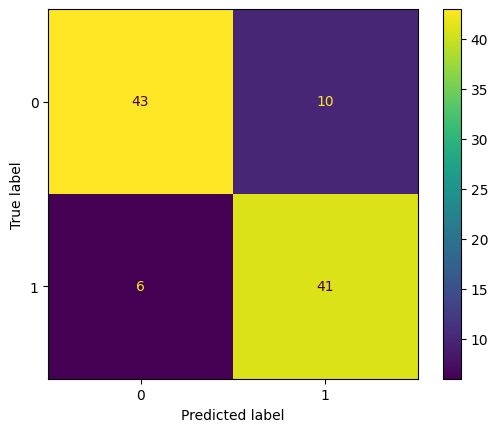

In [ ]:
print('AccuracyScore', accuracy_score(Y_test, pred))
print(classification_report(Y_test, pred))
ConfusionMatrixDisplay(confusion_matrix(Y_test, pred)).plot()